In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# ETL (Extraction, Transform, Load)

**How is our dataset organized and is there any foreseeable issues with it?**

*   The dataset is split into 2 csv files - one for fake data and the other for real data
*   Each data sample has a title, text, subject, and date
* We will need to concat the data together to have a 


**If you were collecting the data would you have organized it differently?**
*   I believe the data was organized pretty well.
* To make it even more simpler/quicker to use, I might have concatenated and added the labels to the csv already

**How was the data generated and do you believe this to be the best way?**

*   We don't know much about how the data was generated. 

**Is there any background on the dataset that could be useful to us?**
​
* Our goal is to predict the truthfullness of an article (i.e. is the article fake or real) using the dataset
* Not much else was given about the dataset

# EDA (Exploratory Data Analysis)

**What are some strengths and weaknesses of your current dataset?**

*   *Strength:* It is organized in a easy to use format - csv
* *Weakness:* Since we don't know much about the dataset, it may be hard to find issues with it

**What features can we create to improve the health of this dataset?**

*   Maybe creating the most relevant topic for each article and figuring out a pattern that relates topic to a fake or real?

**Are there any features you would want but are unable to create?**
* None as of right now

**Are a majority of our features one datatype and is this a good or bad thing?**
* The features are all strings, which is ideal for nlp problems

# Feature Engineering

**What is your target variable?**
* I created the target variable called 'label' that identifies each data sample as fake or real

**What are the original features of this dataset?**
* Original features are the articles' {title, text, subject, and date}

**What are the easiest features for you to expand upon?**
* I think the text feature was ideal to tokenize and use to predict which data sample was real and which one was fake

**What are the most difficult?**
* For now, I only used text to identify which data sample was real and which one was fake - but I believe others can also be used, in which case, the data may be difficult to expand on. 

**Value for your time?**
* None
​

# Model Training 

**Which models are easiest for you to use?**
* Easiest to use is a nlp neural network classifier, which is what I used
* Other models that can be used include RNNs, LSTMs, and even Transformers

**Which model best fits the features of our expanded dataframe?**
* I think any of the above models can be used for the purpose

**Which set of model best captures the relationship of our target variable with the data?**
* All the above models can capture the relationship between the text of the article and the label pretty well 
* I chose a simple nlp neural network classifier that uses tokenized (word) text sequences

**Over/Underfitting?**
* The model performed really well on the training data set (with an accuracy of 100%, but it also performed really well on the validation and testing datasets, so it was able to generalize - which indicates that it didn't underfit, and it also performed well on the testing dataset, so it didn't overfit either
​

# Other

**What are our libraries of choice?**


*   I chose the Tensorflow Keras for building the model since I had some expereince using it for nlp before, but I will be working on a model using Pytorch as well to learn how to use Pytorch
*   Sklearn for data splitting and model evaluation 


**Do we need to use NLP to solve this problem?**
* Yes, you will need NLP to solve this problem, since you need the computer to understand the the text in order to predict if it's fake or real 
* More specifically you are solving a classification problem that uses word tokenized sequences as input into nlp neural network classifier

**What is the best method to creating a Hyperparameter table?**
* Keras has a built-in parameter tuner, but I didn't end up using it

**What was the biggest difficulty in this assignment?**
* Figuring out the feature to input into the model and why the model is performing soo well from the start of training

In [2]:
import nltk

# Import Dataset - Join Fake and True Datasets Together

In [4]:
import pandas as pd
from sklearn.utils import shuffle

dfFake = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Tangible AI - Weekly Assignments/Data/Fake.csv')
dfFake['label'] = 0

dfReal = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Tangible AI - Weekly Assignments/Data/True.csv')
dfReal['label'] = 1

In [5]:
df = pd.concat([dfFake, dfReal])
df = shuffle(df)

In [6]:
df.head()

title  ... label
16884  Zuma spokesman dismisses reports South African...  ...     1
22616  (Don’t Hold The Press) Jeb Bush Endorses Ted C...  ...     0
1285    Mexico Makes Toilet Paper Great Again As Amer...  ...     0
6778   McCain to Trump on Russian hacking: 'The facts...  ...     1
8288    SNL’s ‘Bern Your Enthusiasm’ Explains How Ber...  ...     0

[5 rows x 5 columns]

# Cleaning Dataset

**Lowercase Text**

In [7]:
df2 = df['text'].str.lower()
df['text'] = df2

**Remove Punctuation**

In [8]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df['text'] = df['text'].apply(remove_punctuations)

NameError: ignored

**Remove Stop Words**

In [9]:
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_stop_words(text):
    for word in stopwords.words('english'):
        word = ' ' + word + ' '
        text = text.replace(word, ' ')
    return text

# print(remove_stop_words('it is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.'))

df['text'] = df['text'].apply(remove_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Lemmatization**

In [10]:
nltk.download('wordnet')
nltk.download('punkt')

def lemmatization(text):
    final_text = []
    lemma = nltk.WordNetLemmatizer()
    text = nltk.word_tokenize(text)
    for word in text: 
        wordAppend = lemma.lemmatize(word)
        final_text.append(wordAppend)
    return ' '.join(final_text)

df['text'] = df['text'].apply(remove_stop_words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Split Dataset into Training, Validation, and Testing

In [11]:
from sklearn.model_selection import train_test_split

y = df.pop('label')
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42, shuffle=True)

X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state=42, shuffle=True)

print('Training Samples:', len(X_train))
print('Validation Samples:', len(X_validation))
print('Testing Samples:', len(X_test))

Training Samples: 26938
Validation Samples: 8980
Testing Samples: 8980


# Preprocessing

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import tensorflow as tf
from tensorflow import keras

vocabSize = 15000
embeddingDim = 32
maxLength = 150
paddingType='post'
truncType='post'
oovToken = "<OOV>"

In [13]:
tokenizer = Tokenizer(num_words=vocabSize, oov_token=oovToken)
tokenizer.fit_on_texts(X_train.text)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train.text)
training_padded = pad_sequences(training_sequences, maxlen=maxLength, padding=paddingType, truncating=truncType)

validation_sequences = tokenizer.texts_to_sequences(X_validation.text)
validation_padded = pad_sequences(validation_sequences, maxlen=maxLength, padding=paddingType, truncating=truncType)

test_sequences = tokenizer.texts_to_sequences(X_test.text)
test_padded = pad_sequences(test_sequences, maxlen=maxLength, padding=paddingType, truncating=truncType)

# LSTM Model and Training

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocabSize, output_dim=embeddingDim, input_length=maxLength),
    tf.keras.layers.LSTM(units=128),

    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

In [15]:
# Simple NN
# model = tf.keras.Sequential([
#     tf.keras.layers.Embedding(vocabSize, embeddingDim, input_length=maxLength),
#     tf.keras.layers.GlobalAveragePooling1D(),
#     tf.keras.layers.Dense(256, activation='relu'),
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 32)           480000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               82432     
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 566,593
Trainable params: 566,593
Non-trainable params: 0
_________________________________________________________________


In [17]:
epochs = 15
history = model.fit(training_padded, y_train, epochs=epochs, validation_data=(validation_padded, y_validation), batch_size=256, shuffle=True, verbose=1)

Epoch 1/15
106/106 [==============================] - 7s 33ms/step - loss: 0.4794 - accuracy: 0.7616 - val_loss: 0.1884 - val_accuracy: 0.9471
Epoch 2/15
106/106 [==============================] - 3s 24ms/step - loss: 0.1256 - accuracy: 0.9670 - val_loss: 0.1145 - val_accuracy: 0.9379
Epoch 3/15
106/106 [==============================] - 3s 24ms/step - loss: 0.0697 - accuracy: 0.9816 - val_loss: 0.0171 - val_accuracy: 0.9959
Epoch 4/15
106/106 [==============================] - 3s 24ms/step - loss: 0.0079 - accuracy: 0.9984 - val_loss: 0.0193 - val_accuracy: 0.9959
Epoch 5/15
106/106 [==============================] - 3s 25ms/step - loss: 0.0052 - accuracy: 0.9993 - val_loss: 0.0148 - val_accuracy: 0.9973
Epoch 6/15
106/106 [==============================] - 3s 24ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0152 - val_accuracy: 0.9969
Epoch 7/15
106/106 [==============================] - 3s 25ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0107 - val_accuracy: 0.9981

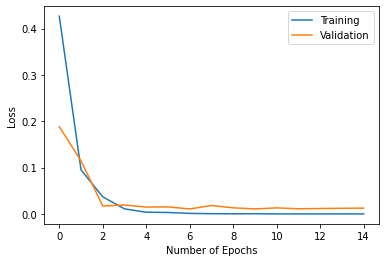

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()

# Evaluation

In [19]:
print("Training Data Accuracy: " + str(round(model.evaluate(training_padded, y_train)[1]*100, 2)) + "%")
print("Validation Data Accuracy: " + str(round(model.evaluate(validation_padded, y_validation)[1]*100, 2)) + "%")
print("Testing Data Accuracy: " + str(round(model.evaluate(test_padded, y_test)[1]*100, 2)) + "%")

842/842 [==============================] - 4s 5ms/step - loss: 1.1028e-05 - accuracy: 1.0000
Training Data Accuracy: 100.0%
281/281 [==============================] - 1s 5ms/step - loss: 0.0125 - accuracy: 0.9979
Validation Data Accuracy: 99.79%
281/281 [==============================] - 1s 5ms/step - loss: 0.0160 - accuracy: 0.9980
Testing Data Accuracy: 99.8%


In [20]:
from sklearn.metrics import classification_report

y_pred = model.predict_classes(test_padded)
# print(y_pred)
print(classification_report(y_test, y_pred, target_names = ['Fake', 'Real']))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      4699
        Real       1.00      1.00      1.00      4281

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



Recall score: 1.0
Precision score: 1.0


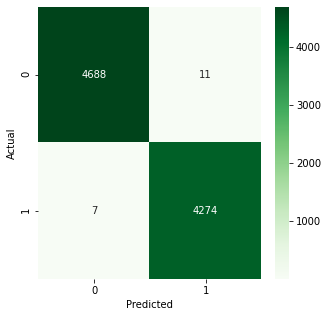

In [21]:
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

ar = metrics.confusion_matrix(y_test, y_pred)

conMat = pd.DataFrame(ar, index=[0,1], columns=[0,1])
conMat.index.name = 'Actual'
conMat.columns.name = 'Predicted'

plt.figure(figsize = (5, 5))
sns.heatmap(conMat,cmap= "Greens", annot = True, fmt='')

precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)

print('Recall score: ' + str(round(recall_score, 2)))
print('Precision score: ' + str(round(precision_score, 2)))